In [13]:
from Node import Node
from numpy import var
import matplotlib.pyplot as plt

def csma(numOfNodes, packetLength, R, maxRetransmissionAttempt, timeOfSimulations):
    nodes = [Node(R[0], maxRetransmissionAttempt) for i in range(numOfNodes)]
    nodeOnTransmission = None
    nodesCountDownTo0 = []
    currentPacketLeft = 0
    channelUsed, channelIdle, numOfCollisions = 0, 0, 0

    for i in range(timeOfSimulations):
        # the channel is busy
        if currentPacketLeft != 0:
            currentPacketLeft -= 1
            channelUsed += 1
            # transmission finished, the node get a new packet
            if currentPacketLeft == 0:
                nodeOnTransmission.getANewPacket()
                nodeOnTransmission.successfulTransmissions += 1
                nodeOnTransmission = None
                pass

        # the channel is idle
        else:
            for node in nodes:
                if node.getBackoff() == 0:
                    nodesCountDownTo0.append(node)
            if len(nodesCountDownTo0) > 0:
                if len(nodesCountDownTo0) > 1:
                    for node in nodesCountDownTo0:
                        numOfCollisions += 1
                        node.collosions += 1
                        node.dropAPacket()
                    nodesCountDownTo0 = []
                    channelIdle += 1
                # only one
                else:
                    nodeOnTransmission = nodesCountDownTo0[0]
                    currentPacketLeft = packetLength
                    currentPacketLeft -= 1
                    channelUsed += 1
                    nodesCountDownTo0 = []
                    
            # no count down to 0, all count down
            else:
                for node in nodes:
                    node.countDown()
                channelIdle += 1
    totalNumOfCollisions = sum([node.collosions for node in nodes])
    return channelUsed * 1. / timeOfSimulations, channelIdle * 1. / timeOfSimulations, totalNumOfCollisions

packetLength = 20
R = [8, 16, 32, 64, 128, 256, 512] 
maxRetransmissionAttempt = 6
timeOfSimulations = 50000 
CUs, CIs, TCs = [], [], []
NOCs = [numOfNodes for numOfNodes in range(5,505,5)]
for numOfNodes in NOCs:
    CU, CI, TC = csma(numOfNodes, packetLength, R, maxRetransmissionAttempt, timeOfSimulations)
    CUs.append(CU)
    CIs.append(CI)
    TCs.append(TC)

a.


[Text(0, 0, '60%'),
 Text(0, 0, '65%'),
 Text(0, 0, '70%'),
 Text(0, 0, '75%'),
 Text(0, 0, '80%'),
 Text(0, 0, '85%'),
 Text(0, 0, '90%')]

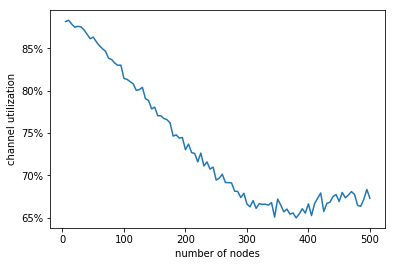

In [14]:
print("a.")
plt.plot(NOCs, CUs)
plt.xlabel("number of nodes")
plt.ylabel("channel utilization")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

b.


[Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%')]

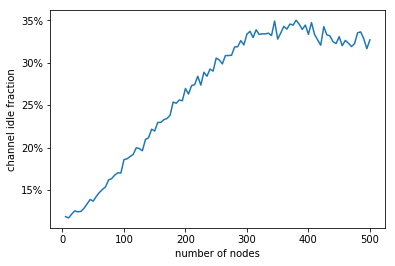

In [15]:
print("b.")
plt.plot(NOCs, CIs)
plt.xlabel("number of nodes")
plt.ylabel("channel idle fraction")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

b.


Text(0, 0.5, 'number of collisions')

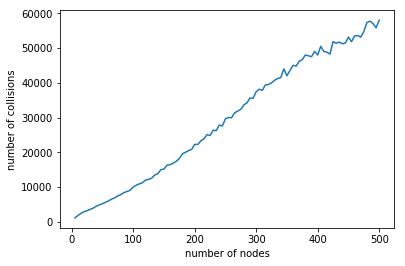

In [16]:
print("b.")
plt.plot(NOCs, TCs)
plt.xlabel("number of nodes")
plt.ylabel("number of collisions")

d.


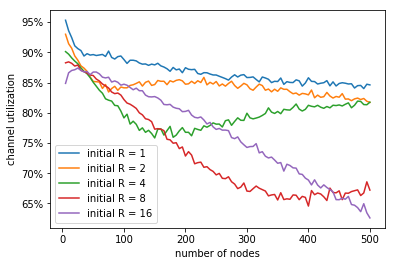

In [18]:
print("d.")
packetLength = 20
Rs = [[1], [2], [4], [8], [16]] 
maxRetransmissionAttempt = 6
timeOfSimulations = 50000 
for R in Rs:
    CUs, CIs, TCs = [], [], []
    NOCs = [numOfNodes for numOfNodes in range(5,505,5)]
    for numOfNodes in NOCs:
        CU, CI, TC = csma(numOfNodes, packetLength, R, maxRetransmissionAttempt, timeOfSimulations)
        CUs.append(CU)
        CIs.append(CI)
        TCs.append(TC)
    plt.plot(NOCs, CUs, label="initial R = " + str(R[0]))
    plt.xlabel("number of nodes")
    plt.ylabel("channel utilization")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
    


e.


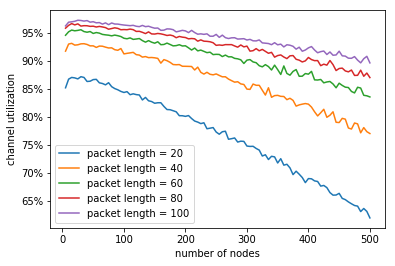

In [20]:
print("e.")
Ls = [20, 40, 60, 80, 100]
Rs = [[1], [2], [4], [8], [16]] 
maxRetransmissionAttempt = 6
timeOfSimulations = 50000 
for packetLength in Ls:
    CUs, CIs, TCs = [], [], []
    NOCs = [numOfNodes for numOfNodes in range(5,505,5)]
    for numOfNodes in NOCs:
        CU, CI, TC = csma(numOfNodes, packetLength, R, maxRetransmissionAttempt, timeOfSimulations)
        CUs.append(CU)
        CIs.append(CI)
        TCs.append(TC)
    plt.plot(NOCs, CUs, label = "packet length = " + str(packetLength))
    plt.xlabel("number of nodes")
    plt.ylabel("channel utilization")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()

